Using Colab cache for faster access to the 'bank-marketing-campaigh-dataset' dataset.
Path to dataset files: /kaggle/input/bank-marketing-campaigh-dataset
Using CSV file: /kaggle/input/bank-marketing-campaigh-dataset/bank-full.csv
Shape of dataset: (45210, 17)
Columns: Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'durations', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')
First 5 rows:
    age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  durations  campaign  pdays  previo

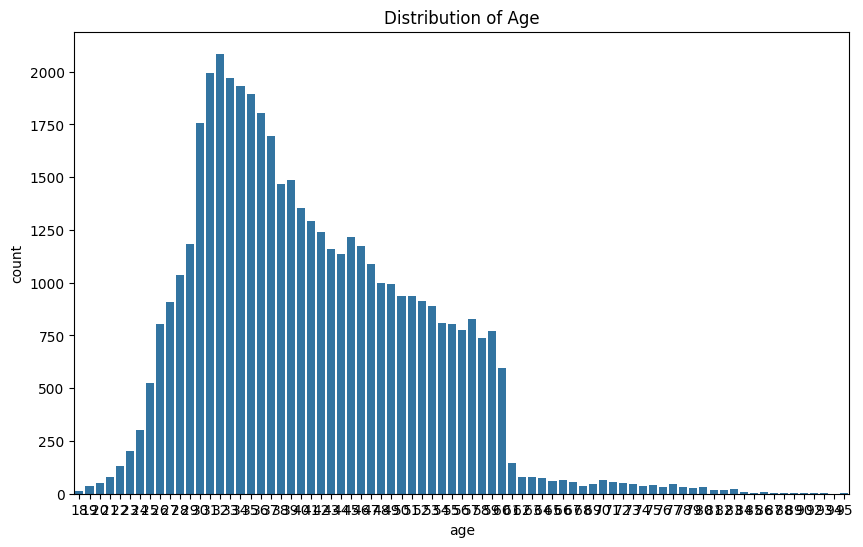

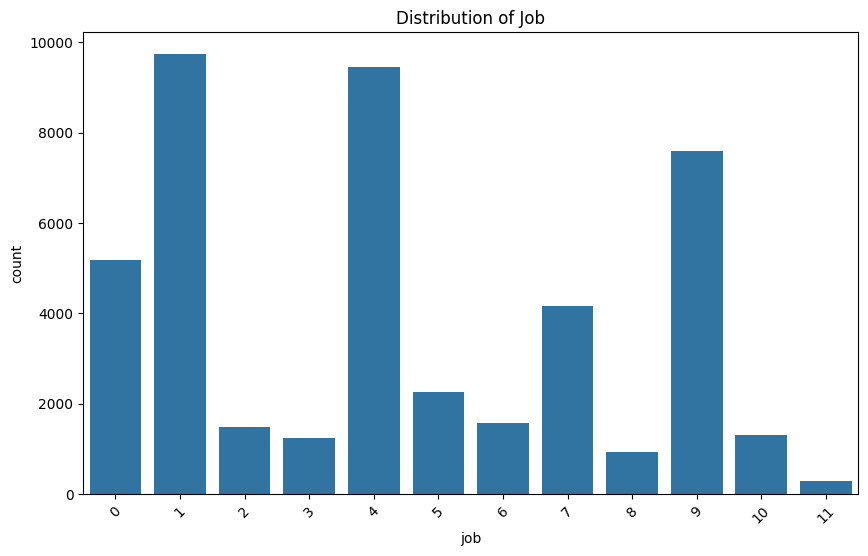

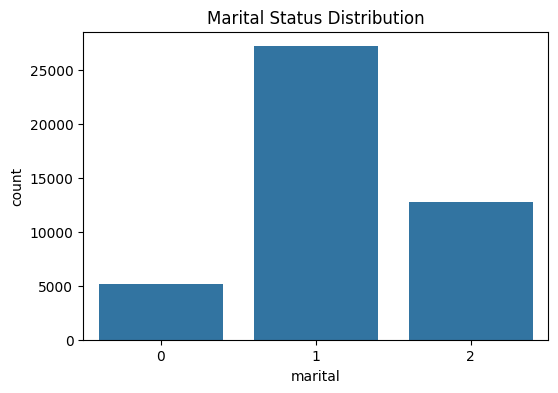

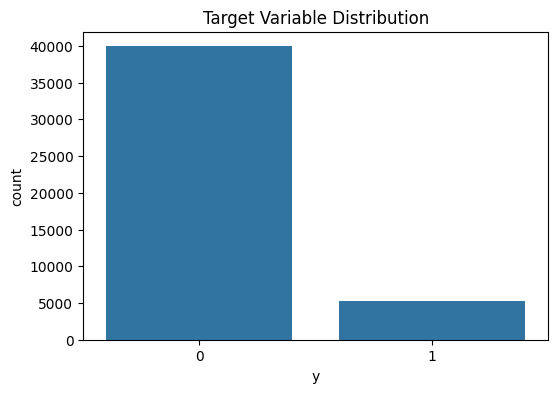

Logistic Regression Accuracy: 0.887193098871931
Confusion Matrix:
 [[7792  157]
 [ 863  230]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      7949
           1       0.59      0.21      0.31      1093

    accuracy                           0.89      9042
   macro avg       0.75      0.60      0.62      9042
weighted avg       0.86      0.89      0.86      9042

ROC-AUC Score: 0.5953395485423602
Decision Tree Accuracy: 0.8950453439504534
Confusion Matrix:
 [[7677  272]
 [ 677  416]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      7949
           1       0.60      0.38      0.47      1093

    accuracy                           0.90      9042
   macro avg       0.76      0.67      0.70      9042
weighted avg       0.88      0.90      0.88      9042

ROC-AUC Score: 0.6731928509941637
Top 5 features influencing loan acceptance:
   

In [ ]:
# Task 5: Personal Loan Acceptance Prediction
# Introduction and Problem Statement:
# The goal of this project is to predict which bank customers are likely to accept a personal loan offer.
# This helps the bank target the right customers for marketing campaigns, improve conversion rates, 
# and optimize resources by focusing on potential clients.

# Dataset Understanding and Description:
# The dataset used is the Bank Marketing Dataset from the UCI Machine Learning Repository.
# It contains customer demographic and behavioral information such as age, job, marital status, 
# education, and previous interactions. The target variable 'y' indicates whether a customer accepted 
# the personal loan offer (1) or not (0).


# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import os
import glob

# 2. Load Dataset from KaggleHub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gatunnopvp/bank-marketing-campaigh-dataset")

print("Path to dataset files:", path)

# Dynamically find the .csv file within the downloaded dataset
csv_files = glob.glob(os.path.join(path, '**/*.csv'), recursive=True)

if not csv_files:
    raise FileNotFoundError(f"No CSV file found in the downloaded dataset at {path}.")

# Prioritize 'bank_marketing.csv' or 'bank.csv' if available, otherwise take the first found.
data_file = None
preferred_names = ['bank_marketing.csv', 'bank.csv']

for preferred_name in preferred_names:
    for f in csv_files:
        if preferred_name in os.path.basename(f):
            data_file = f
            break
    if data_file:
        break

if data_file is None:
    data_file = csv_files[0] # Fallback to the first CSV found

print(f"Using CSV file: {data_file}")
data = pd.read_csv(data_file, sep=';') # Added sep=';' to correctly parse the CSV

# 3. Dataset Understanding
print("Shape of dataset:", data.shape)
print("Columns:", data.columns)
print("First 5 rows:\n", data.head())
print("Missing values:\n", data.isnull().sum())

# 4. Data Cleaning & Preparation
# Encode categorical variables
categorical_cols = data.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# Separate features (X) and target (y) BEFORE scaling
X = data.drop('y', axis=1)
y = data['y']

# Optional: feature scaling - apply ONLY to X
scaler = StandardScaler()
numeric_cols_in_X = X.select_dtypes(include=np.number).columns # Identify numeric columns in X to scale
X[numeric_cols_in_X] = scaler.fit_transform(X[numeric_cols_in_X])

# 5. Exploratory Data Analysis (EDA)
plt.figure(figsize=(10,6))
sns.countplot(x='age', data=data) # Using original 'data' for age before X/y split for visualization purposes
plt.title('Distribution of Age')
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(x='job', data=data)
plt.title('Distribution of Job')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='marital', data=data)
plt.title('Marital Status Distribution')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='y', data=data)  # Target variable (will be 0/1 after LabelEncoder, before scaling) for visualization
plt.title('Target Variable Distribution')
plt.show()

# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Model Training
# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Decision Tree
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# 8. Evaluation Metrics
# Logistic Regression
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_log))

# Decision Tree
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_tree))

# 9. Business Insight Extraction
# Identify important features from Decision Tree
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': tree_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)
print("Top 5 features influencing loan acceptance:\n", feature_importances.head())

# 10. Conclusion
# Summarize key findings
print("""
Conclusion:
# Customers with certain job types and higher ages are more likely to accept the offer.
- Marital status and previous marketing interactions also influence acceptance.
- Logistic Regression and Decision Tree models provide useful predictions for targeting potential customers.
""")